In [1]:
import pandas as pd
import numpy as np
import datetime
from pandasql import sqldf
pysql = lambda q: sqldf(q, globals())

In [44]:
df = pd.read_csv('final3.csv')
df.head(10)

,Indicator_Name,Adjusted net national income per capita (annual % growth),Age dependency ratio (% of working-age population),"Air transport, passengers carried",Consumer price index (2010 = 100),"Employment to population ratio, 15+, total (%) (national estimate)",Fuel exports (% of merchandise exports),Fuel imports (% of merchandise imports),GDP (current US$),GDP per capita (current US$),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)",Population ages 15-64 (% of total),"Population ages 15-64, total",Population growth (annual %),"Population, total",Urban population (% of total)
0,1981,3.143402,52.769194,13219500.0,30.020812,57.599998,16.006403,13.592959,176599000000,11830.86532,16.744354,9.487666,65.458226,9770949,1.586853,14927000,85.700
1,1982,0.508062,52.269485,13187900.0,33.428720,56.427502,18.219829,14.434542,193722000000,12763.32361,16.833742,11.351820,65.673042,9967854,1.667536,15178000,85.670
2,1983,-0.861468,51.967464,12601500.0,36.784599,54.416599,23.156939,10.828450,176986000000,11515.80647,15.627413,10.038911,65.803562,10113349,1.250548,15369000,85.641
3,1984,3.270454,51.633972,13236800.0,38.241415,55.108700,24.357027,9.012943,193194000000,12428.85793,15.009024,3.960396,65.948285,10251001,1.132222,15544000,85.611
4,1985,0.427975,51.186393,14412100.0,40.816857,55.784199,26.911089,6.756610,180191000000,11434.88989,17.309665,6.734694,66.143516,10422895,1.367346,15758000,85.582
5,1986,1.215482,51.012782,15497300.0,44.510926,56.886501,22.828880,4.622227,181977000000,11360.52766,18.086141,9.050351,66.219557,10607314,1.638989,16018400,85.552
6,1987,0.169411,50.603101,16880200.0,48.309053,56.935600,20.937695,4.868464,189041000000,11623.35967,17.094011,8.533022,66.399693,10799180,1.520987,16263900,85.522
7,1988,5.832533,50.107027,18816300.0,51.795005,57.872002,17.330317,4.021250,235700000000,14257.02216,16.644749,7.215940,66.619136,11013609,1.636207,16532200,85.493
8,1989,2.984112,49.742783,15114300.0,55.697190,59.259602,17.394747,5.136125,299318000000,17801.26827,16.979151,7.533903,66.781180,11228855,1.692567,16814400,85.463
9,1990,-0.112070,49.592036,17553400.0,59.781478,59.331699,21.454362,5.695178,310838000000,18214.83698,17.070363,7.333022,66.848477,11407759,1.479978,17065100,85.433


In [45]:
df.shape

(108, 17)

In [46]:
df.columns
#features = ['NNI','Age','CPI','Emp','Fuelexp','Fuelimp','GDP','GDPpc','Imports','Inflation','PopGrowth','PopTot','UrbTot']


Index(['Indicator_Name',
       'Adjusted net national income per capita (annual % growth)',
       'Age dependency ratio (% of working-age population)',
       'Air transport, passengers carried',
       'Consumer price index (2010 = 100)',
       'Employment to population ratio, 15+, total (%) (national estimate)',
       'Fuel exports (% of merchandise exports)',
       'Fuel imports (% of merchandise imports)', 'GDP (current US$)',
       'GDP per capita (current US$)',
       'Imports of goods and services (% of GDP)',
       'Inflation, consumer prices (annual %)',
       'Population ages 15-64 (% of total)', 'Population ages 15-64, total',
       'Population growth (annual %)', 'Population, total',
       'Urban population (% of total)'],
      dtype='object')

In [47]:
cols = ['Year','Net National Income','Working Age Percentage','Total Passengers','Consumer Price Index','Employment to Population Ratio','Fuel Exports %','Fuel Imports %','GDP','GDP Per Capita','Imports','Inflation','Population Percentage(15-64)','Population Total(15-64)','Population Growth %','Population Total','Urban Population %']
df.columns = cols

In [0]:
#df.to_csv('file.csv',index = False)
#files.download('file.csv')

In [48]:
df.isnull().values.any()

True

In [49]:
df = df.dropna()

In [50]:
df.shape

(106, 17)

In [51]:
df.isnull().values.any()

False

In [52]:
corr = df.corr()
corr

,Year,Net National Income,Working Age Percentage,Total Passengers,Consumer Price Index,Employment to Population Ratio,Fuel Exports %,Fuel Imports %,GDP,GDP Per Capita,Imports,Inflation,Population Percentage(15-64),Population Total(15-64),Population Growth %,Population Total,Urban Population %
Year,1.000000,-0.264745,-0.201981,0.238154,0.988878,0.385216,0.136886,0.161755,0.381158,0.914024,0.391145,-0.640399,0.207142,0.089959,0.086028,0.086720,0.348317
Net National Income,-0.264745,1.000000,0.155119,-0.102839,-0.249474,-0.103712,-0.116179,-0.243335,-0.152192,-0.287450,-0.021326,-0.098294,-0.153207,-0.057513,-0.206940,-0.054976,-0.196154
Working Age Percentage,-0.201981,0.155119,1.000000,-0.091309,-0.127703,-0.302745,-0.529177,-0.374409,-0.118406,-0.258963,0.292305,-0.014241,-0.999896,-0.007027,-0.596142,0.001053,-0.486701
Total Passengers,0.238154,-0.102839,-0.091309,1.000000,0.246288,0.567650,-0.620792,0.436302,0.964813,0.392834,-0.599564,-0.239373,0.087624,0.975651,-0.007026,0.974551,-0.427712
Consumer Price Index,0.988878,-0.249474,-0.127703,0.246288,1.000000,0.373584,0.071724,0.157715,0.385187,0.911131,0.411490,-0.663217,0.133190,0.113050,0.002668,0.110318,0.257862
Employment to Population Ratio,0.385216,-0.103712,-0.302745,0.567650,0.373584,1.000000,-0.257981,0.280816,0.460361,0.522705,-0.438425,-0.249343,0.303903,0.521346,0.450208,0.522180,-0.131080
Fuel Exports %,0.136886,-0.116179,-0.529177,-0.620792,0.071724,-0.257981,1.000000,-0.006453,-0.535477,0.067719,0.294331,0.147101,0.532967,-0.710830,0.496052,-0.714763,0.823522
Fuel Imports %,0.161755,-0.243335,-0.374409,0.436302,0.157715,0.280816,-0.006453,1.000000,0.415577,0.367189,-0.336715,0.153403,0.373607,0.465066,0.231526,0.460385,-0.152936
GDP,0.381158,-0.152192,-0.118406,0.964813,0.385187,0.460361,-0.535477,0.415577,1.000000,0.504070,-0.444690,-0.293687,0.115457,0.907369,-0.068659,0.904712,-0.294704
GDP Per Capita,0.914024,-0.287450,-0.258963,0.392834,0.911131,0.522705,0.067719,0.367189,0.504070,1.000000,0.167453,-0.535998,0.262053,0.265377,0.178726,0.262037,0.221061


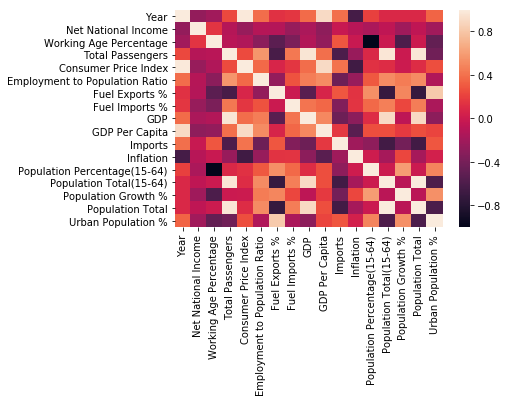

In [53]:
import seaborn as sns
sns.heatmap(corr)

In [0]:
#df = df.drop([31])
#df.head(35)

In [54]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest=train_test_split(df,test_size=0.05)

In [78]:
#cols = ['Year','Net National Income','Working Age Percentage','Total Passengers','Consumer Price Index','Employment to Population Ratio','Fuel Exports %','Fuel Imports %','GDP','GDP Per Capita','Imports','Inflation','Population Percentage(15-64)','Population Total(15-64)','Population Growth%','Population Total','Urban Population %']
features = ['Net National Income','Consumer Price Index','Employment to Population Ratio','Fuel Imports %','GDP','GDP Per Capita','Imports','Population Growth %','Population Total','Urban Population %']
target = ['Total Passengers']
features_all = ['Net National Income','Working Age Percentage','Consumer Price Index','Employment to Population Ratio','Fuel Exports %','Fuel Imports %','GDP','GDP Per Capita','Imports','Inflation','Population Percentage(15-64)','Population Total(15-64)','Population Growth %','Population Total','Urban Population %']

In [0]:
#features = ['NNI','CPI','Emp','Fuelimp','GDP','GDPpc','Imports','PopGrowth','PopTot','UrbTot']
#cols = ['Year','NNI','Age','Count','CPI','Emp','Fuelexp','Fuelimp','GDP','GDPpc','Imports','Inflation','Popperc','Pop15','PopGrowth','PopTot','UrbTot']
#features = ['Fuel','EmpPop','NNI','Age','CPI','GDP','GNI','Imports','Inflation','Population','PopGrowth','UrbPop']
#features = ['NNI','Age','CPI','Emp','Fuelimp','GDPpc','Imports','Inflation','PopGrowth','PopTot','UrbTot']

#target = ['Count']

In [72]:
Xtest.shape

(6, 17)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
model = LinearRegression()
clf = Ridge(alpha=1.0)
clf2 = Ridge(alpha=1.0)
clf3 = Ridge(alpha=1.0)
clf4 = Ridge(alpha=1.0)

In [89]:
clf3.fit(Xtrain[features_all],Xtrain[target])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [90]:
clf.fit(Xtrain[features],Xtrain[target])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [92]:
y_pred = clf.predict(Xtest[features])
#y_pred = np.absolute(y_pred)
y_test = Xtest[target]
y = Xtrain[target]

In [93]:
rms = sqrt(mean_squared_error(y_pred, y_test))
print('RMS error is : ',rms)

RMS error is :  12227265.886622772


In [94]:
rms/y_test.mean()

Total Passengers    0.088944
dtype: float64

In [114]:
y_pred = clf3.predict(Xtest[features_all])
#y_pred = np.absolute(y_pred)
y_test = Xtest[target]
y = Xtrain[target]
ms = sqrt(mean_squared_error(y_pred, y_test))
print('RMS error is : ',rms)
ms/y_test.mean()

RMS error is :  12227265.886622772


Total Passengers    0.099976
dtype: float64

In [103]:
#k cross validation

X = df[features].values
Y = df[target].values
X_a = df[features_all].values

In [98]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf2, X, Y,scoring='neg_mean_absolute_error', cv=10)

In [107]:
scoresx = cross_val_score(clf4, X_a, Y,scoring='neg_mean_absolute_error', cv=10)
scoresx

array([-26630420.54852885, -13342143.59603503,  -9867169.52300374,
       -26924189.78003881, -14521522.9518774 , -30380997.71531231,
       -16966314.9679961 , -13184460.38077016, -14128412.39475474,
        -9981146.96005333])

In [108]:
scores

array([-18307255.57674495,  -7826046.64714334,  -7003263.60628952,
       -28039748.70088787, -11814028.36527369, -29522201.16872944,
       -16872913.40667851, -11651648.81698167, -13481110.65107   ,
        -9105789.49935763])

In [109]:
pred = -1*scores.mean()

In [110]:
pred/y.mean()

Total Passengers    0.064899
dtype: float64

In [113]:
predx = -1*scoresx.mean()
predx/y.mean()

Total Passengers    0.074321
dtype: float64

In [106]:
y_pred

array([[5.48640402e+08],
       [4.50615098e+07],
       [6.16149309e+07],
       [5.98570342e+07],
       [8.47263328e+07],
       [3.61204623e+05]])

In [0]:
ratio = [0.164251162,0.058975531,0.086497048,0.072408272,0.016425116,0.026311782,0.113960956,0.076483306,0.077899116,0.110193269,0.082435873,0.114158644]

In [0]:
sum(ratio)

1.000000075

In [0]:
z = 10
ans = []
for val in ratio:
  ans.append(z*val)

In [0]:
ans

[1.64251162,
 0.5897553099999999,
 0.8649704800000001,
 0.72408272,
 0.16425116,
 0.26311782,
 1.13960956,
 0.76483306,
 0.77899116,
 1.10193269,
 0.82435873,
 1.14158644]

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
final_model = Ridge(alpha=1.0)
final_model.fit(df[features],df[target])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
y = df[target]

In [31]:
scores = cross_val_score(clf, X, Y,scoring='neg_mean_absolute_error', cv=10)

In [32]:
pred = -1*scores.mean()
print(pred)
print(pred/y.mean())

15362400.643915664
Total Passengers    0.066476
dtype: float64


In [33]:
scores = cross_val_score(clf, X, Y,scoring='neg_mean_squared_error', cv=10)

In [34]:
pred = -1*scores.mean()
print(pred)
print(pred/(y.mean()*y.mean()))

399620933848414.6
Total Passengers    0.007483
dtype: float64


In [35]:
scores = cross_val_score(clf, X, Y,scoring='explained_variance', cv=10)

In [36]:
scores.mean()

-1.4915768986934286

In [37]:
scores = cross_val_score(clf, X, Y,scoring='neg_mean_squared_log_error', cv=10)

In [38]:
scores.mean()

-0.25642456453618173

In [39]:
scores = cross_val_score(clf, X, Y,scoring='neg_median_absolute_error', cv=10)

In [40]:
scores.mean()

-15569117.968329456

In [41]:
scores = cross_val_score(clf, X, Y,scoring='r2', cv=10)

In [42]:
scores.mean()

-6.257432337666783